In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.spatial import ConvexHull

In [3]:
points = np.random.rand(7, 2) 
hull = ConvexHull(points)

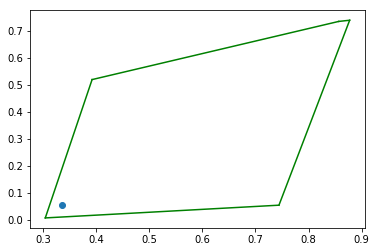

In [4]:
fig, ax = plt.subplots()
num_polygons = 1
num_dots = 1
num_sides = 6

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'g-')
x = np.random.rand(num_dots)
y = np.random.rand(num_dots)

ax.scatter(x,y)
plt.show()


In [5]:
print([tuple(points[i]) for i in hull.vertices])

[(0.3039430222198144, 0.00675324361578844), (0.7442024679933443, 0.05385957283656062), (0.8774112013406743, 0.7380435390275698), (0.856842995050957, 0.7336811178162047), (0.392111796502428, 0.5185256151275797)]


In [6]:
%run helper.ipynb
    

In [8]:
def is_contain(point, vertices):
    z = vertices[0]
    start = 1
    end = len(vertices) - 1
    
    while end - start > 1:
        sep = start + end // 2         
        if where_is_dot(point, vertices[start], vertices[sep]) < 0:
            end = sep
        else:
            start = sep
    return not is_intersect(z, point, vertices[start], vertices[end])

In [9]:
is_contain((*x, *y), [tuple(points[i]) for i in hull.vertices])

True

In [10]:
def is_contain_experimental(point, vertices):
    iterator = zip(vertices, vertices[1:] + vertices[:1])
    for A, B in iterator:
        if where_is_dot(point, A, B) < 0:
            return 'Point is external'
    else:
        return 'Point is internal'

In [11]:
is_contain_experimental((*x, *y), [tuple(points[i]) for i in hull.vertices])

'Point is internal'